<a href="https://colab.research.google.com/github/plaban1981/POCs/blob/main/Parse_PDF_tables_using_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PDF tables’ parsing using YOLOv3

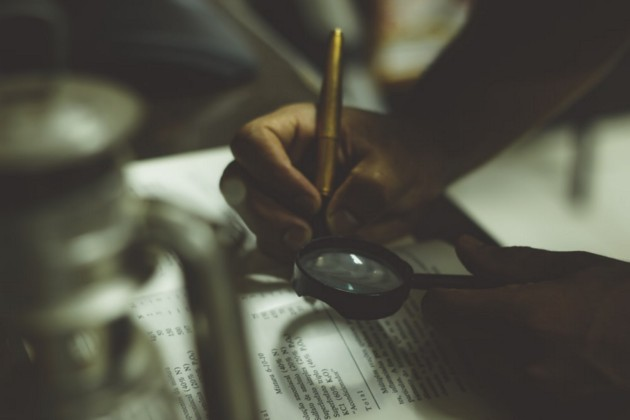

## PDF files or **Portable Document Format** 

* PDF files are a type of files developed by Adobe in order to enable the creation of various forms of content. 

* Particularly, it allows consistent safety regarding the change in its content. 

* A PDF file can host different types of data: text, images, media, …etc. 

* It is a tag-structured file which makes it easy to parse it just like an HTML page.

* We can separate the PDF files into two classes:

    * **Text-based files**: containing text that can be copied and pasted
    * **Image-based files**: contained images such as scanned documents

 ## Requires Libraries
 
 
* python libraries which enable PDF files parsing both text-based and image-based ones which will be OCRised and then processed as a text-based file.

* **Image-based pdf files**

   1.1. OCRMYPDF

* **Text-based pdf files**
   2.1. PyPDF2

   2.2. PDF2IMG

   2.4. Camelot

   2.5. Camelot mixed with YOLOV3

## Load Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the pdf document

In [ ]:
from google.colab import files
files.upload()

Saving 4Q19-Press-Release.pdf to 4Q19-Press-Release.pdf


{'4Q19-Press-Release.pdf': b'%PDF-1.5\n1 0 obj\n<</Type /Pages\n/Kids [3 0 R 5 0 R 7 0 R 9 0 R 11 0 R 13 0 R 15 0 R 17 0 R 19 0 R 21 0 R 23 0 R 25 0 R 27 0 R 29 0 R]\n/Count 14>>\nendobj\n3 0 obj\n<</Type /Page\n/Parent 1 0 R\n/MediaBox [0 0 612.00 792.00]\n/Resources 2 0 R\n/Rotate 0\n/Contents 4 0 R>>\nendobj\n4 0 obj\n<</Length 22012>>\nstream\nBT /F1 10.00 Tf ET\n0 Tr\n/GS0 gs\n0 Tw 0 Tc 100 Tz 0 TL \nq 0 0 0 rg BT 303.20 31.25 Td (1) Tj ET Q\n/GS0 gs\nq 512.00 0 0 55.00 50.00 694.00 cm\n/I1 Do Q\nBT /F2 10.00 Tf ET\nBT /F3 11.00 Tf ET\nq 0 0 0 rg BT 50.00 671.80 Td (Boeing Reports Fourth-Quarter Results) Tj ET Q\nBT /F4 10.00 Tf ET\nq 0 0 0 rg BT 50.00 650.80 Td (Fourth Quarter 2019) Tj ET Q\nBT /F5 10.00 Tf ET\n/GS0 gs\nq 4.00 0 0 10.10 50.00 633.64 cm\n/I2 Do Q\nq 0 0 0 rg BT 54.00 635.80 Td ( ) Tj ET Q\nBT /F5 10.00 Tf ET\nq 0 0 0 rg BT 68.00 635.80 Td (Financial results continue to be significantly impacted by the 737 MAX grounding) Tj ET Q\nBT /F2 10.00 Tf ET\n/GS0 gs\nq 4.00

## Copy the pdf file to google drive

In [ ]:
import os
import shutil
shutil.copy("/content/4Q19-Press-Release.pdf","/content/drive/MyDrive/ZeoanAI_Poc")

'/content/drive/MyDrive/ZeoanAI_Poc/4Q19-Press-Release.pdf'

## 1. Image-based pdf files

#### 1.1. OCRMYPDF

Ocrmypdf is a python package which allow to turn an image-based pdf into a text-based one, where text can be selected, copied and pasted.

Main OCR Lib can be found here : https://github.com/jbarlow83/OCRmyPDF 
Everything else is a compulsory dependency.

In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev
!pip install pytesseract
!apt install ghostscript
!pip install ocrmypdf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,002 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../tesserac

In [ ]:
!ocrmypdf --help

usage: ocrmypdf [-h] [-l LANGUAGES] [--image-dpi DPI]
                [--output-type {pdfa,pdf,pdfa-1,pdfa-2,pdfa-3}]
                [--sidecar [FILE]] [--version] [-j N] [-q] [-v [VERBOSE]]
                [--title TITLE] [--author AUTHOR] [--subject SUBJECT]
                [--keywords KEYWORDS] [-r] [--remove-background] [-d] [-c]
                [-i] [--unpaper-args UNPAPER_ARGS] [--oversample DPI]
                [--remove-vectors] [--threshold] [-f] [-s] [--redo-ocr]
                [--skip-big MPixels] [-O {0,1,2,3}] [--jpeg-quality Q]
                [--png-quality Q] [--jbig2-lossy] [--pages PAGES]
                [--max-image-mpixels MPixels]
                [--pdf-renderer {auto,hocr,sandwich,hocrdebug}]
                [--rotate-pages-threshold CONFIDENCE]
                [--pdfa-image-compression {auto,jpeg,lossless}]
                [--fast-web-view MEGABYTES] [--plugin PLUGINS] [-k]
                [--tesseract-config CFG] [--tesseract-pagesegmode PSM]
                [

## OCRmyPDF

OCRmyPDF is a Python 3 application and library that adds OCR layers to PDFs.

## About OCR

Optical character recognition is technology that converts images of typed or handwritten text, such as in a scanned document, to computer text that can be selected, searched and copied.

**OCRmyPDF** uses Tesseract, the best available open source OCR engine, to perform OCR.

In [ ]:
! ocrmypdf --force-ocr "/content/4Q19-Press-Release.pdf" "output_file.pdf"

    3 page already has text! - rasterizing text and running OCR anyway
    4 page already has text! - rasterizing text and running OCR anyway
    5 page already has text! - rasterizing text and running OCR anyway
    6 page already has text! - rasterizing text and running OCR anyway
    7 page already has text! - rasterizing text and running OCR anyway
    8 page already has text! - rasterizing text and running OCR anyway
    9 page already has text! - rasterizing text and running OCR anyway
   10 page already has text! - rasterizing text and running OCR anyway
   11 page already has text! - rasterizing text and running OCR anyway
   12 page already has text! - rasterizing text and running OCR anyway
   13 page already has text! - rasterizing text and running OCR anyway
   14 page already has text! - rasterizing text and running OCR anyway
OCR: 100% 14.0/14.0 [01:23<00:00,  5.99s/page]
Postprocessing...
PDF/A conversion: 100% 14/14 [00:08<00:00,  1.69page/s]
JPEGs: 0image [00:00, ?imag

**where**:
* ocrmypdf: the path variable
* input_file.pdf: the image-based pdf file
* output_file.pdf: the output text-based file


**note** since the above pdf file was text based do tried to do --force-ocr

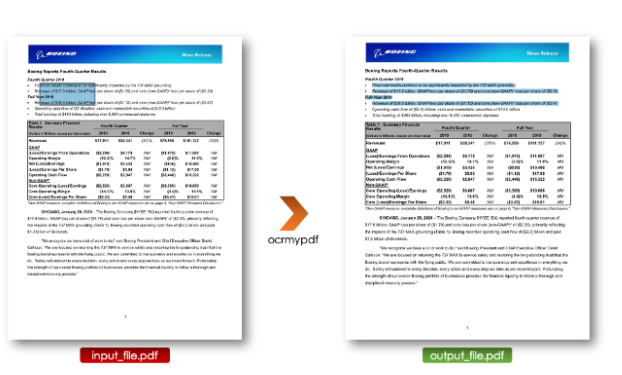

* Once the pdf is turned into a text-based one, it can be treated using all the libraries detailed below.

https://ocrmypdf.readthedocs.io/en/latest/introduction.html

## 2. Text-based pdf files


we will mainly focus on three python libraries that allow to extract the content of a text-based pdf file.

## 2.1. PyPDF2
PyPDF2 is a python tool which enables us to parse basic information about the pdf file such the author the title…etc. 

It also allows the get the text of a given page along with splitting pages and opening encrypted files under the assumption of having the password.

In [ ]:
!pip install PyPDF2

     |████████████████████████████████| 77 kB 4.8 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=4178f92a6487ed6225d6f24e8f8d8b4d935680ff8154c89cb6ac0a3f912bbfbb
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


## Reading a pdf file:

In [ ]:
from PyPDF2 import PdfFileWriter, PdfFileReader
PDF_PATH = "/content/4Q19-Press-Release.pdf"
pdf_doc = PdfFileReader(open(PDF_PATH, "rb"))

## Extracting document information:

In [ ]:
print("---------------PDF's info---------------")
print(pdf_doc.documentInfo)
print("PDF is encrypted: " + str(pdf_doc.isEncrypted))
print("---------------Number of pages---------------")
print(pdf_doc.numPages)

---------------PDF's info---------------
{'/Producer': 'WebFilings', '/Title': '2019 12 Dec 31 8K Press Release Exhibit 99.1', '/CreationDate': 'D:202001281616'}
PDF is encrypted: False
---------------Number of pages---------------
14


## Splitting documents page by page:

In [ ]:
#indexation starts at 0
pdf_page_1 = pdf_doc.getPage(0)
pdf_page_4 = pdf_doc.getPage(3)
pdf_page_5 = pdf_doc.getPage(4)
pdf_page_13 = pdf_doc.getPage(13)
print(pdf_page_1)
print(pdf_page_4)
print(pdf_page_5)
print(pdf_page_13)

{'/Type': '/Page', '/Parent': IndirectObject(1, 0), '/MediaBox': [0, 0, 612, 792], '/Resources': IndirectObject(2, 0), '/Rotate': 0, '/Contents': IndirectObject(4, 0)}
{'/Type': '/Page', '/Parent': IndirectObject(1, 0), '/MediaBox': [0, 0, 612, 792], '/Resources': IndirectObject(2, 0), '/Rotate': 0, '/Contents': IndirectObject(10, 0)}
{'/Type': '/Page', '/Parent': IndirectObject(1, 0), '/MediaBox': [0, 0, 612, 792], '/Resources': IndirectObject(2, 0), '/Rotate': 0, '/Contents': IndirectObject(12, 0)}
{'/Type': '/Page', '/Parent': IndirectObject(1, 0), '/MediaBox': [0, 0, 612, 792], '/Resources': IndirectObject(2, 0), '/Rotate': 0, '/Contents': IndirectObject(30, 0)}


## Extracting text from a page:

In [ ]:
text = pdf_page_13.extractText()
print(text[:1000])

14The Boeing Company and Subsidiaries Reconciliation of Non-GAAP Measures (Unaudited) The tables provided below reconcile the non-GAAP financial measures core operating (loss)/earnings, core operating margin, and core (loss)/earnings per share with the most directly comparable GAAP financial measures, (loss)/earnings from operations, operating margin, and diluted (loss)/earnings per share. See page 6 of this release for additional information on the use of these non-GAAP financial measures.(Dollars in millions, except per share data)Full Year 2019Full Year 2018$ millionsPer Share$ millionsPer ShareRevenues76,559101,127(Loss)/earnings from operations (GAAP)(1,975)11,987Operating margin (GAAP)(2.6)%11.9%FAS/CAS service cost adjustment:Pension FAS/CAS service cost adjustment(1,071)(1,005)Postretirement FAS/CAS service cost adjustment(344)(322)FAS/CAS service cost adjustment(1,415)(1,327)Core operating (loss)/earnings (non-GAAP)($3,390)$10,660Core operating margin (non-GAAP)(4.4)%10.5%Dilu

## Merging documents page by page:

In [ ]:
new_pdf = PdfFileWriter()
new_pdf.addPage(pdf_page_1)
new_pdf.addPage(pdf_page_4)
new_pdf.addPage(pdf_page_5)
new_pdf.addPage(pdf_page_13)
new_pdf.write(open("new_merged_pdf.pdf", "wb"))
print(new_pdf)

## Cropping pages:

In [ ]:
print("Upper Left: ", pdf_page_1.cropBox.getUpperLeft())
print("Lower Right: ", pdf_page_1.cropBox.getLowerRight())

x1, y1 = 0, 550
x2, y2 = 612, 320

cropped_page = pdf_page_1
cropped_page.cropBox.upperLeft = (x1, y1)
cropped_page.cropBox.lowerRight = (x2, y2)

cropped_pdf = PdfFileWriter()
cropped_pdf.addPage(cropped_page)
cropped_pdf.write(open("cropped.pdf", "wb"))

Upper Left:  (0, 792)
Lower Right:  (612, 0)


## Encrypting and decrypting PDF files:

In [ ]:
PASSWORD = "password_123"
encrypted_pdf = PdfFileWriter()
encrypted_pdf.addPage(pdf_page_1)
encrypted_pdf.encrypt(PASSWORD)
encrypted_pdf.write(open("encrypted_pdf.pdf", "wb"))

read_encrypted_pdf = PdfFileReader(open("encrypted_pdf.pdf", "rb"))
print(read_encrypted_pdf.isEncrypted)
if read_encrypted_pdf.isEncrypted:
    read_encrypted_pdf.decrypt(PASSWORD)
print(read_encrypted_pdf.documentInfo)

True
{'/Producer': 'PyPDF2'}


## 2.2. PDF2IMG

* **PDF2IMG** is a python library that allows turning pdf pages into images that can be processed, for instance, by computer vision algorithms.

* PDF2IMG can be installed using pip by running the following command line:

In [ ]:
! pip install pdf2image

We can set the first page and the last page to be transformed to images from the pdf file.

In [ ]:
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (200 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 156235 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
from pdf2image import convert_from_path
import PIL
import matplotlib.pyplot as plt
%matplotlib inline
page=0
PDF_PATH = "/content/output_file.pdf"
img_page = convert_from_path(PDF_PATH, first_page=page, last_page=page+1, output_folder="./", fmt="jpg")
print(img_page)
for page in img_page:
    page.save('out.jpg', 'JPEG')

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x2200 at 0x7FEE72329990>]


## converted images

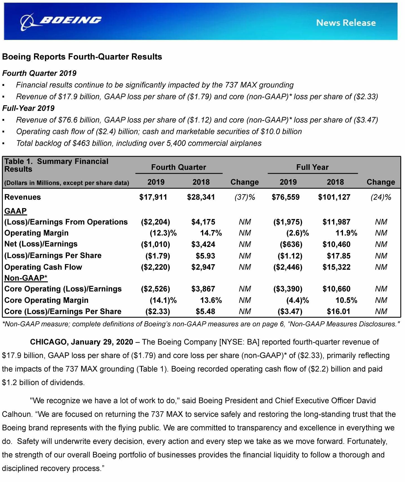

## 2.3. Camelot

* **Camelot** is a python library specialized in parsing tables of pdfs pages. 
* It can be installed using pip by running the following command line:

In [ ]:
! pip install camelot-py[cv]

     |████████████████████████████████| 40 kB 28 kB/s 
     |████████████████████████████████| 11.7 MB 10.5 MB/s 


* The output of the parsing is a pandas dataframe which is very useful for data processing.

In [ ]:
import camelot
output_camelot = camelot.read_pdf(filepath="/content/4Q19-Press-Release.pdf", pages=str(0), flavor="stream")
print(output_camelot)
table = output_camelot[0]
print(table)
print(table.parsing_report)

<TableList n=1>
<Table shape=(15, 3)>
{'accuracy': 98.29, 'whitespace': 15.56, 'order': 1, 'page': 0}


* Camelot offers two flavors **lattice** and **stream**, 

* We need to use stream since it is more flexible to tables structure.

In [ ]:
output_camelot

<TableList n=1>

In [ ]:
! pip install borb

     |████████████████████████████████| 6.4 MB 7.9 MB/s 
     |████████████████████████████████| 217 kB 67.8 MB/s 
     |████████████████████████████████| 869 kB 59.0 MB/s 
     |████████████████████████████████| 784 kB 53.9 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 62 kB 989 kB/s 
  Created wheel for qrcode: filename=qrcode-7.3-py3-none-any.whl size=40238 sha256=e09d38361a44580db874ac18913c97fbcb66199bcb700f29ecbe7a9bbe44e415
  Stored in directory: /root/.cache/pip/wheels/4f/ed/3e/24f78bcb5ee2f41ec2322691ff82ed037f7f5a21d79ed33565
Successfully built qrcode
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not 

In [ ]:
import typing
from borb.pdf.document import Document
from borb.pdf.pdf import PDF


# New import
from borb.toolkit.text.simple_text_extraction import SimpleTextExtraction
from borb.toolkit.image.simple_image_extraction import SimpleImageExtraction

def main():

    d: typing.Optional[Document] = None
    #l: SimpleTextExtraction = SimpleTextExtraction()
    l: SimpleImageExtraction = SimpleImageExtraction()
    with open("/content/4Q19-Press-Release.pdf", "rb") as pdf_in_handle:
        d = PDF.loads(pdf_in_handle, [l])

    assert d is not None
    print(l.get_images_for_page(0))
    #print(l.get_text_for_page(0))


if __name__ == "__main__":
    main()


[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1233x133 at 0x7FEB6C501AD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=33x84 at 0x7FEB6C4FCC50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=33x84 at 0x7FEB6C50AC10>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=33x84 at 0x7FEB6B62A550>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=33x84 at 0x7FEB6C4FC750>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=33x84 at 0x7FEB6B62A8D0>]


Ohad Nae

 

Boeing Reports Fourth-Quarter Results

Fourth Quarter 2019
Financial results continue to be significantly impacted by the 737 MAX grounding
« — Revenue of $17.9 billion, GAAP loss per share of ($1.79) and core (non-GAAP)* loss per share of ($2.33)
Full-Year 2019
«Revenue of $76.6 billion, GAAP loss per share of ($1.12) and core (non-GAAP)* loss per share of ($3.47)
Operating cash flow of ($2.4) billion; cash and marketable securities of $10.0 billion
Total backlog of $463 billion, including over 5,400 commercial airplanes

Table 1. Summary Financial
Results . Fourth Quarter Full Year

(Dollars in Millions, except per share data) 2019 2018 Change 2019 2018
Revenues $17,911 $28,341 (37)% $76,559 $101,127 (24)%

GAAP

(Loss)/Earnings From Operations ($2,204) $4,175 NM ($1,975) $11,987 NM
Operating Margin (12.3)% 14.7% NM (2.6)% 11.9% NM
Net (Loss)/Earnings ($1,010) $3,424 NM ($636) $10,460 NM
(Loss)/Earnings Per Share ($1.79) $5.93 NM ($1.12) $17.85 NM
Operating Cash Flow ($2

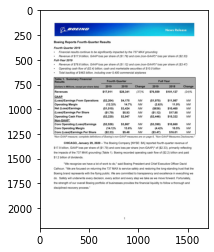

In [ ]:
import PIL
import matplotlib.pyplot as plt

import pytesseract
value=PIL.Image.open("/content/out.jpg")
plt.imshow(value)
text = pytesseract.image_to_string(value, lang="eng",config="--psm3")    
print(text)

Reconciliation of Net income attributableto Genpact Limited shareholders/Margin to Adjusted Income
from Operatio1
(In thousands)

YearendedDecember31, Three months ended December 31,

Net income attributable to Genpact Limitedshareholders $282,019 $ 304,881 79,147 82,198
Less: Foreign exchange (gains) losses, net (15,239) (7,729) (186) (4,083)
Add: Interest (income) expense, net 37,119 43,458 9,473 9,971
Add: Income tax expense 80,763 94,536 27,495 32,151
Add: Stock-based compensation 48,998 83,885 16,840 22,579
Add: Amortization of acquired intangible assets 37,292 31,458 9,333 8,768
Add: Acquisition-related expenses 2,362 8,352 7,385,
Adjusted income from operations $4733144 $558841 _ 142,102 158,969
Net incomeattributable to Genpact Limited shareholders

margin 9.4% 8.7% _ 9.5% 8.7%
Adjusted income from operations margm 15.8% 15.9% 17.0% 16.9%

Reconciliation of Income from Operations /Margin to Adjusted Income from Operations/Margm
(Inthousands)

YearendedDecember 31, Three months 

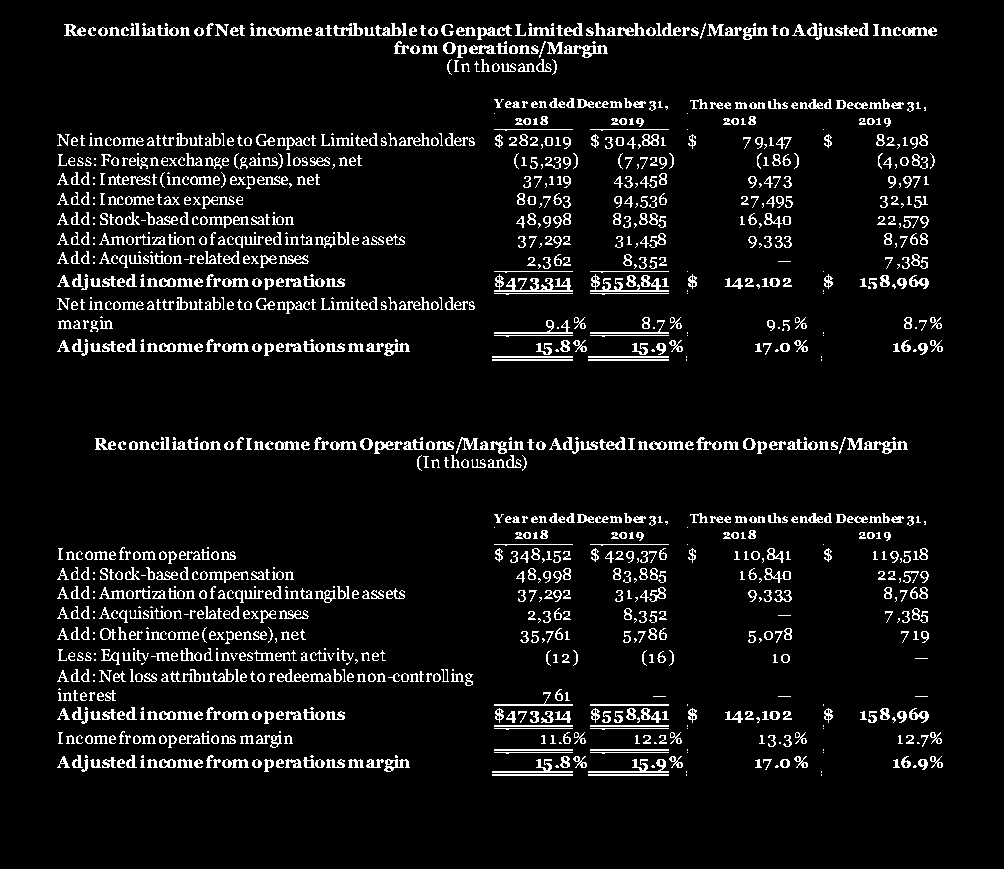

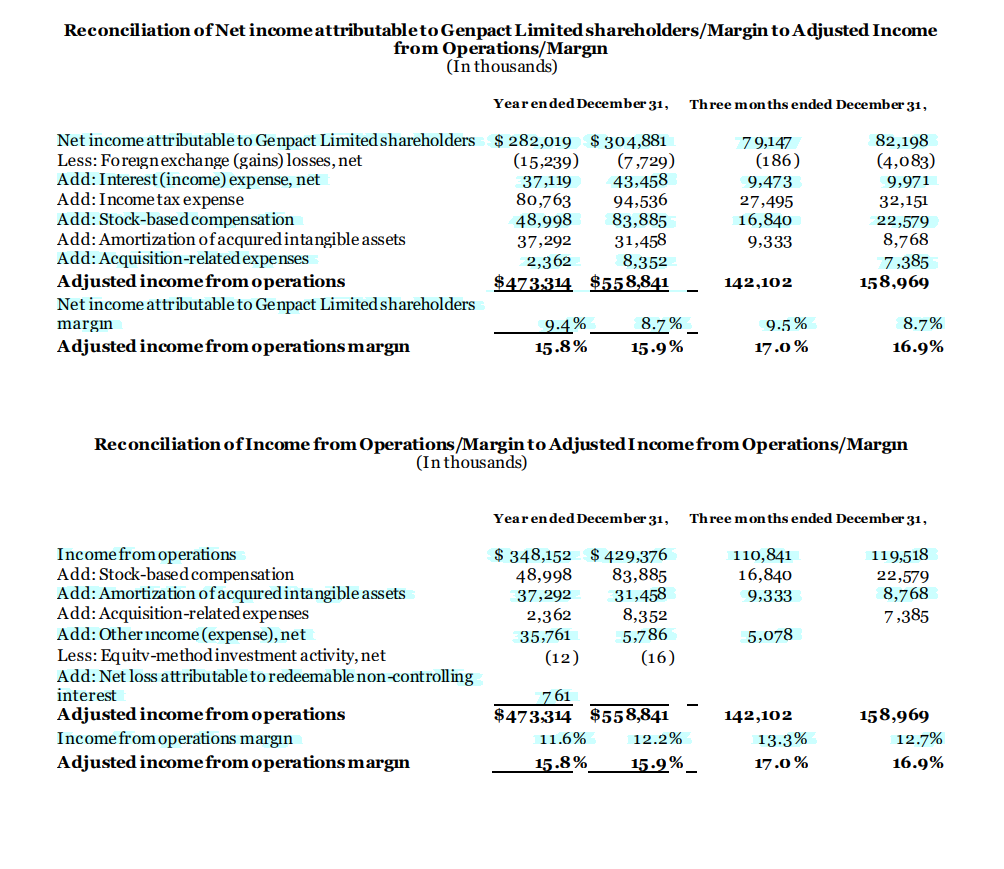

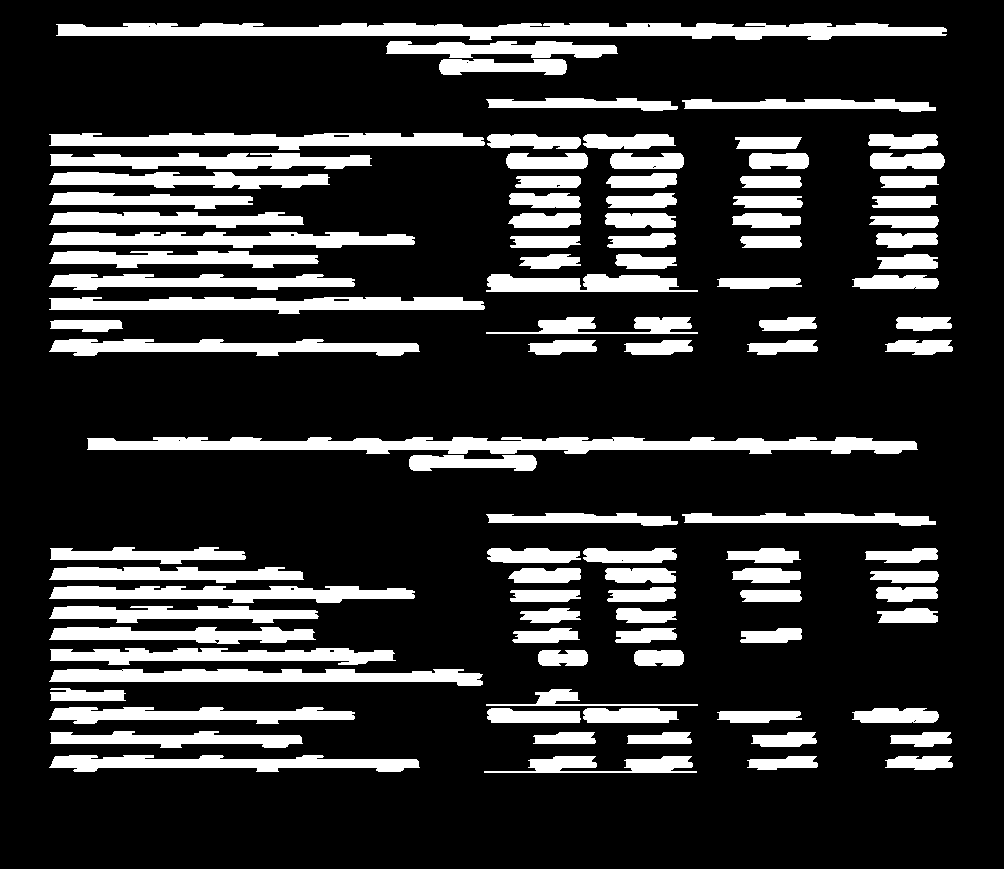

In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

# Load image, grayscale, and Otsu's threshold
image = cv2.imread('/content/Finance statement page.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,0,0), 2)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,15))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,0,0), 3)

# Dilate to connect text and remove dots
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
dilate = cv2.dilate(thresh, kernel, iterations=2)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

# Bitwise-and to reconstruct image
result = cv2.bitwise_and(image, image, mask=dilate)
result[dilate==0] = (255,255,255)

# OCR
data = pytesseract.image_to_string(result, lang='eng',config='--psm 3')
print(data)

cv2_imshow(thresh)
cv2_imshow(result)
cv2_imshow(dilate)


https://fazlurnu.com/2020/06/23/text-extraction-from-a-table-image-using-pytesseract-and-opencv/

https://github.com/fazlurnu/Text-Extraction-Table-Image